<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-MCD/blob/main/02-Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Preprocesamiento de Texto</h1>

## Ejercicios - Tarea 2

### Repite la nube de palabras con los documentos del 20newsgroups

Primero repetimos la nube de palabras solo tokenizando

In [1]:
# Instalar wordcloud
!pip install -qq wordcloud

In [2]:
# Instalar spaCy
#pip install spacy

In [3]:
# Importar corpus
from sklearn.datasets import fetch_20newsgroups

# Cargar datos de baseball
docs_newsgroups = fetch_20newsgroups(subset='train',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=['rec.sport.baseball']
                                     )

lista_docs_20ng = docs_newsgroups.data
print(f"{len(lista_docs_20ng)} documentos")

597 documentos


In [4]:
# Importar spacy
import spacy

# Cargar modelo inglés
nlp = spacy.load('en_core_web_sm')

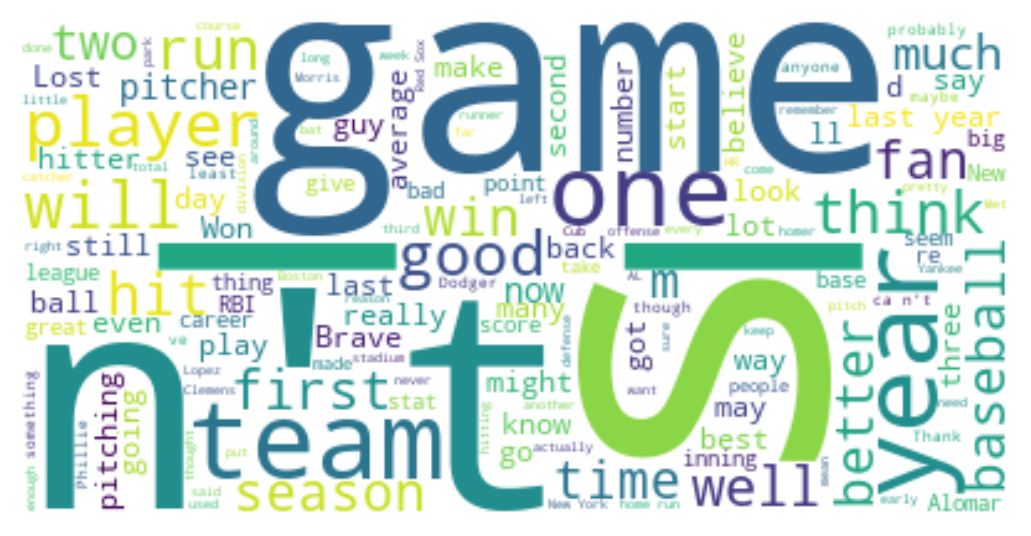

In [5]:
# Importar clase WordCloud de librería wordcloud
from wordcloud import WordCloud

# Importar librería matplotlib
import matplotlib.pyplot as plt

# Tokenizar documentos
docs_spacy = nlp(" ".join(lista_docs_20ng))

# Almacenar tokens en lista
lista_tokens = [t.text for t in docs_spacy]

# Instanciar objeto WordCloud
wc = WordCloud(background_color="white")
# Alimentar objeto wc con el texto
wc_img = wc.generate(" ".join(lista_tokens))

# Crear y mostrar la figura
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Ahora produciremos nubes de palabras secuenciales:

* Quitando stopwords y signos de puntuación.

In [6]:
# Importar módulo punctuation
from string import punctuation

# Crear lista con signos de puntuación
punctuations = list(punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


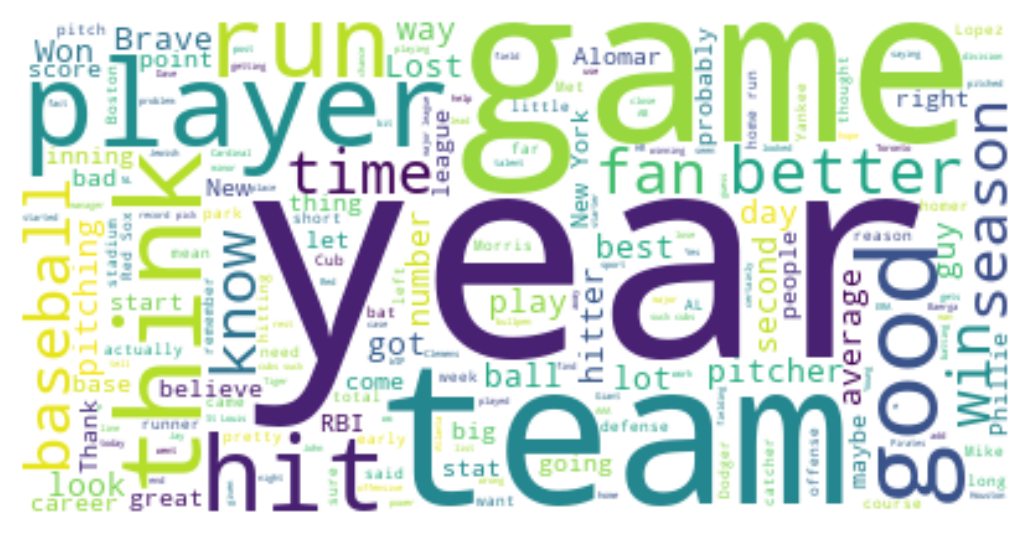

In [7]:
# Almacenar tokens en lista sin stop words ni signos de puntuación
lista_tokens = [t.text for t in docs_spacy if not t.is_stop and t.text not in punctuations]

# Instanciar objeto WordCloud
wc = WordCloud(background_color="white")
# Alimentar objeto wc con el texto
wc_img = wc.generate(" ".join(lista_tokens))

# Crear y mostrar la figura
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

* Quitando stopwords y puntuación, además aplicando lematización.

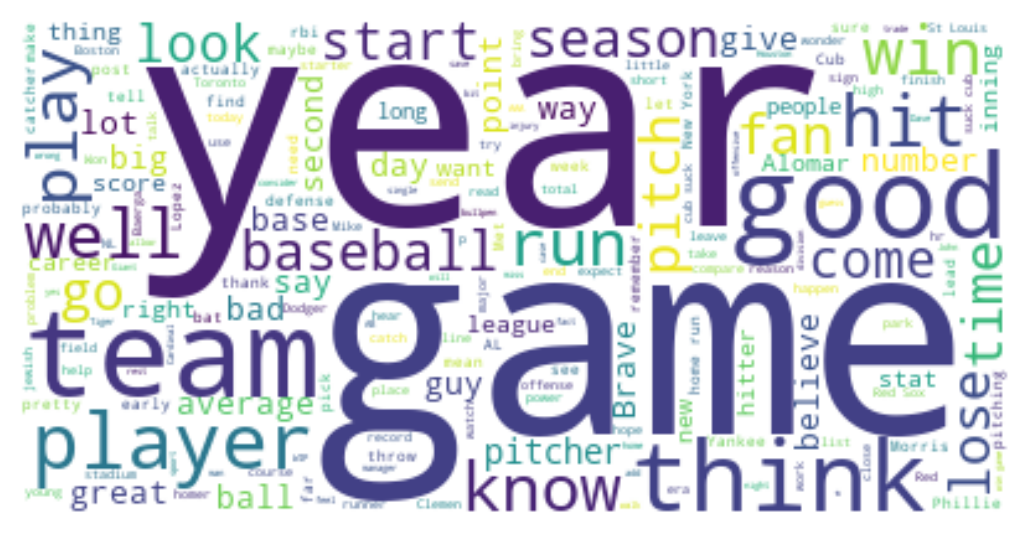

In [8]:
# Almacenar lemmas en lista sin stop words ni signos de puntuación
lista_tokens = [t.lemma_ for t in docs_spacy if not t.is_stop and t.text not in punctuations]

# Instanciar objeto WordCloud
wc = WordCloud(background_color="white")
# Alimentar objeto wc con el texto
wc_img = wc.generate(" ".join(lista_tokens))

# Crear y mostrar la figura
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

* Quitando stopwords y puntuación, además aplicando stemming (spacy no lo soporta nativamente, busca opciones en NLTK).

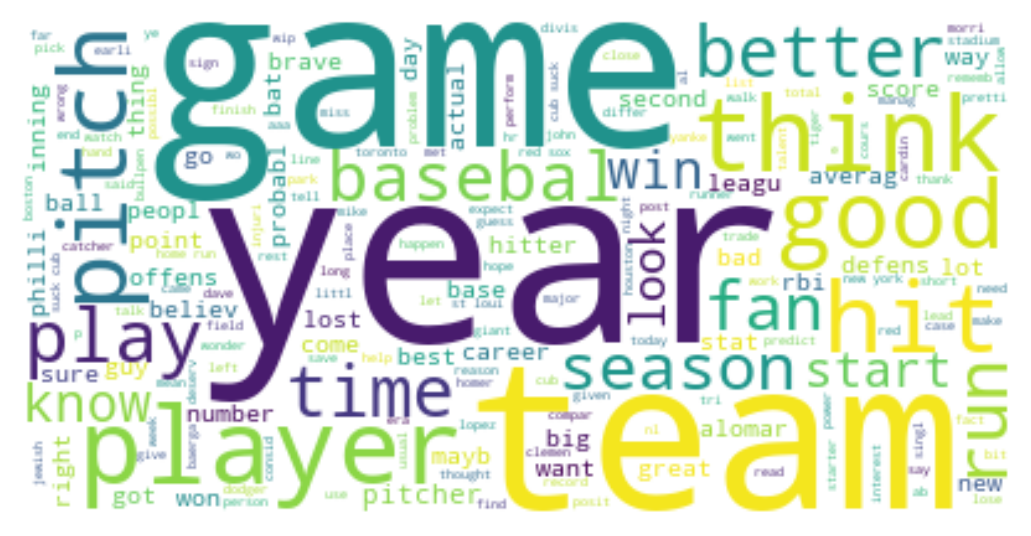

In [9]:
# Importar librería nltk 
import nltk
# Del módulo nltk.stem importar PorterStemmer
from nltk.stem import PorterStemmer

# Instanciar el stemmer
stemmer = PorterStemmer()

# Almacenar stemmed tokens en lista sin stop words ni signos de puntuación
lista_tokens = [stemmer.stem(t.text) for t in docs_spacy if not t.is_stop and t.text not in punctuations]

# Instanciar objeto WordCloud
wc = WordCloud(background_color="white")
# Alimentar objeto wc con el texto
wc_img = wc.generate(" ".join(lista_tokens))

# Crear y mostrar la figura
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

**¿Cuál consideras que captura de manera más clara la temática de los documentos?**

Aunque la diferencia es mínima entre las estrategias de aplicar lematización y stemming seguido por la eliminación de stop words y signos de puntuación, considero que la primera genera una nube de palabras que resalta un poco más el tema principal del texto. Esto puede apreciarse en la relevancia que tienen palabras como baseball, pitcher y hit.

### Repite la estrategia que hayas escogido como la mejor para analizar ahora otro conjunto de documentos.

Escoge documentos de otro tema del mismo corpus 20newsgroups. Aplica la misma estrategia anterior para producir dos nubes de palabras.


In [10]:
# Listar temas disponibles
newsgroups = fetch_20newsgroups(subset='train')
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [11]:
# Cargar datos de atheism
docs_newsgroups_space = fetch_20newsgroups(subset='train',
                                           remove=('headers', 'footers', 'quotes'),
                                           categories=['rec.autos']
                                           )

lista_docs_20ng_autos = docs_newsgroups_space.data
print(f"{len(lista_docs_20ng_autos)} documentos")

594 documentos


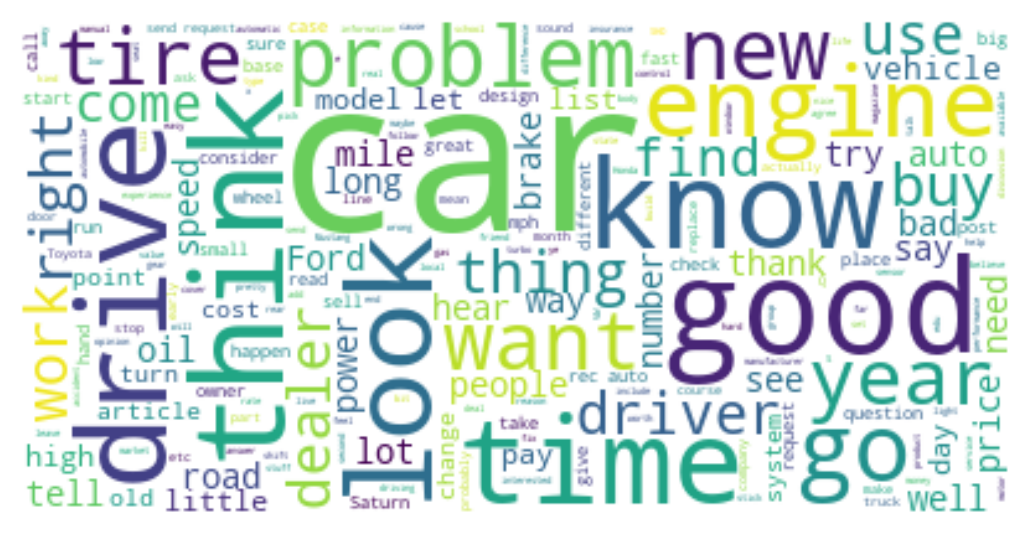

In [12]:
# Tokenizar documentos
docs_spacy = nlp(" ".join(lista_docs_20ng_autos))

# Almacenar lemmas en lista sin stop words ni signos de puntuación
lista_tokens = [t.lemma_ for t in docs_spacy if not t.is_stop and t.text not in punctuations]

# Instanciar objeto WordCloud
wc = WordCloud(background_color="white")
# Alimentar objeto wc con el texto
wc_img = wc.generate(" ".join(lista_tokens))

# Crear y mostrar la figura
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

**¿Consideras que ambas nubes de palabras reflejan las temáticas subyacentes de los documentos?**

Considero que sí. Aunque, por ejemplo, en el caso de la nube de palabras de beisbol podrías inicialmente pensar que se trata simplemente de un deporte, eventualmente das con la información que especifíca el hecho de que se trata de beisbol. En el caso de los autos es mucho más evidente el tema a primera vista.